In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from test_function import *
import random
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from test_function import *
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
x_column = ['SIFT_pred','LRT_pred', 'MA_pred', 'PROVEN_pred', 'SLR_score', 'SIFT_score','LRT_omega', 
                'MA_score', 'PROVEN_score', 'Grantham', 'HMMEntropy','HMMRelEntropy', 'PredRSAB', 'PredRSAI', 
                'PredRSAE','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 'PredStabilityH','PredStabilityM', 
                'PredStabilityL', 'PredSSE', 'PredSSH','PredSSC', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver','RNA_seq','UNEECON']
y_column = 'clinvar_result'



In [3]:
def spliting_chr(df, search_pattern, xcolumn, ycolumn):
    chx = df[df['location'].str.contains(search_pattern)]
    other = df.loc[~df['location'].isin(chx['location'])]
    
    y_chx = chx.loc[:,[ycolumn]].values.flatten()
    X_chx = chx.loc[:,xcolumn]
    
    y_other = other.loc[:,[ycolumn]].values.flatten()
    X_other = other.loc[:,xcolumn]
    
    print('shape of set containing %s = %s'%(search_pattern, X_chx.shape))
    print('shape of set not containing %s  = %s'%(search_pattern, X_other.shape))
    
    return(X_chx, X_other, y_chx, y_other, chx, other)


In [4]:
# processing data
# import data
omit = pd.read_csv("unannotated_omit_std.tsv", sep = "\t")
dominant = pd.read_csv('dominant_std.tsv', sep = "\t")
recessive = pd.read_csv('recessive_std.tsv', sep = "\t")

# sum(omit['clinvar_result']) # 31317
# print(omit.loc[omit['clinvar_result'] == 0].shape) #46363
balanced_num = omit.loc[omit['clinvar_result'] == 0].shape[0] - sum(omit['clinvar_result'])
# print(balanced_num) #15046


# balanced overall data
random.seed(42)
sample = omit.loc[omit['clinvar_result'] == 0].sample(n = balanced_num)
omit = omit.loc[~omit['location'].isin(sample['location'])]
omit.shape



(62634, 33)

In [5]:
# splitting data to training data, validation data, testing data(chr2, 10% of overall data)
X_test, X_train, y_test, y_train, chr1, nochr1 = spliting_chr(omit,'chr1-', x_column, y_column)
X_test_domi, X_train_domi, y_test_domi, y_train_domi,domi_chr1, domi_nochr1 = spliting_chr(dominant, 'chr1-', x_column, y_column)
X_test_recess, X_train_recess, y_test_recess, y_train_recess, recess_chr1, recess_nochr1  = spliting_chr(recessive,'chr1-', x_column, y_column)

print('')
X_valid,X_train2, y_valid,  y_train2, valid, notvalid  = spliting_chr(nochr1,'chr2-',x_column, y_column)
X_valid_domi, X_train2_domi, y_valid_domi,y_train2_domi, valid_domi,notvalid_domi= spliting_chr(domi_nochr1, 'chr2-',x_column, y_column)
X_valid_recess,X_train2_recess,  y_valid_recess,  y_train2_recess,valid_recess, notvalid_recess = spliting_chr(recess_nochr1,'chr2-',x_column, y_column)

shape of set containing chr1- = (5415, 30)
shape of set not containing chr1-  = (57219, 30)
shape of set containing chr1- = (153, 30)
shape of set not containing chr1-  = (1797, 30)
shape of set containing chr1- = (201, 30)
shape of set not containing chr1-  = (2563, 30)

shape of set containing chr2- = (5809, 30)
shape of set not containing chr2-  = (51410, 30)
shape of set containing chr2- = (258, 30)
shape of set not containing chr2-  = (1539, 30)
shape of set containing chr2- = (261, 30)
shape of set not containing chr2-  = (2302, 30)


In [6]:
valid.to_csv('/storage/home/jkl5991/work/project/not_conflict/cv/0730/validation/valid.tsv', sep = '\t',index = False)
valid_domi.to_csv('/storage/home/jkl5991/work/project/not_conflict/cv/0730/validation/valid_domi.tsv', sep = '\t',index = False)
valid_recess.to_csv('/storage/home/jkl5991/work/project/not_conflict/cv/0730/validation/valid_recess.tsv', sep = '\t',index = False)

notvalid.to_csv('/storage/home/jkl5991/work/project/not_conflict/cv/0730/validation/train.tsv', sep = '\t',index = False)
notvalid_domi.to_csv('/storage/home/jkl5991/work/project/not_conflict/cv/0730/validation/train_domi.tsv', sep = '\t',index = False)
notvalid_recess.to_csv('/storage/home/jkl5991/work/project/not_conflict/cv/0730/validation/train_recess.tsv', sep = '\t',index = False)



/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


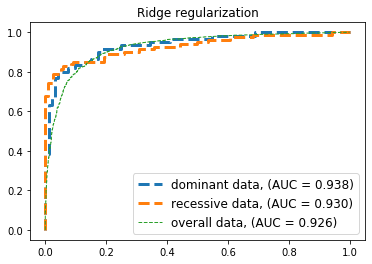

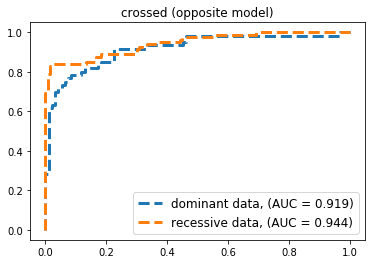

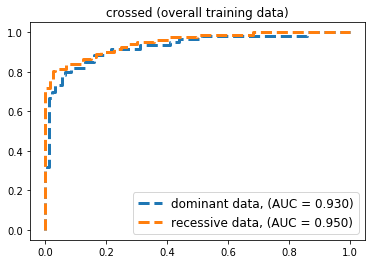

In [19]:
#logistic regression
def logistic(Xtrain, ytrain, Xtest, ytest, fitmodel = False):    
    if(fitmodel != False):
        model = fitmodel
        
    else:
        model = LogisticRegression(random_state = 42 , penalty = 'l2').fit(Xtrain, ytrain)
        
    test_hat = model.predict_proba(Xtest)[:,1]
    return(ytest,test_hat, model)


domi_l2 = logistic(X_train2_domi, y_train2_domi, X_test_domi, y_test_domi)
recess_l2 = logistic(X_train2_recess, y_train2_recess, X_test_recess, y_test_recess)
omit_l2 = logistic(X_train2, y_train2, X_test, y_test)
plt.rcParams['figure.figsize'] = [6,4]
drawROC(domi_l2[0], domi_l2[1],label = 'dominant data')
drawROC(recess_l2[0],recess_l2[1], label = "recessive data")
drawROC(omit_l2[0],omit_l2[1], lw =1,label = "overall data",lastone = True, title = "Ridge regularization")

# ridge cross
domi_l2_cross = logistic(0, 0, X_test_domi, y_test_domi, fitmodel = recess_l2[2])
recess_l2_cross = logistic(0,0, X_test_recess, y_test_recess, fitmodel = domi_l2[2])

drawROC(domi_l2_cross[0], domi_l2_cross[1],label = 'dominant data')
drawROC(recess_l2_cross[0],recess_l2_cross[1], label = "recessive data", lastone = True, title = "crossed (opposite model)")

# overall crossed
domi_l2_overall = logistic(0,0,X_test_domi, y_test_domi, fitmodel = omit_l2[2])
recess_l2_overall = logistic(0,0,X_test_recess, y_test_recess, fitmodel = omit_l2[2])

drawROC(domi_l2_overall[0], domi_l2_overall[1],label = 'dominant data')
drawROC(recess_l2_overall[0],recess_l2_overall[1], label = "recessive data", lastone = True, title = "crossed (overall training data)")

In [9]:
def get_ROC(ax,ytest, ytest_hat, label, lastone = False, x = 'False Positive Rate', y = 'True Positive Rate', title = None, legendloc = 'lower right', lw = 2, linestyle = '-'):
    fpr, tpr, thresholds = roc_curve(ytest, ytest_hat)
    auroc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw = lw, linestyle = linestyle, label = label +', (auROC=%0.3f)'%auroc)
    if(lastone == True):
        ax.set_xlabel(x,fontsize = 22)
        ax.set_ylabel(y, fontsize = 22)
        ax.set_title(title, fontsize = 22)
        ax.legend(loc='lower right',fontsize = 22)
        
        


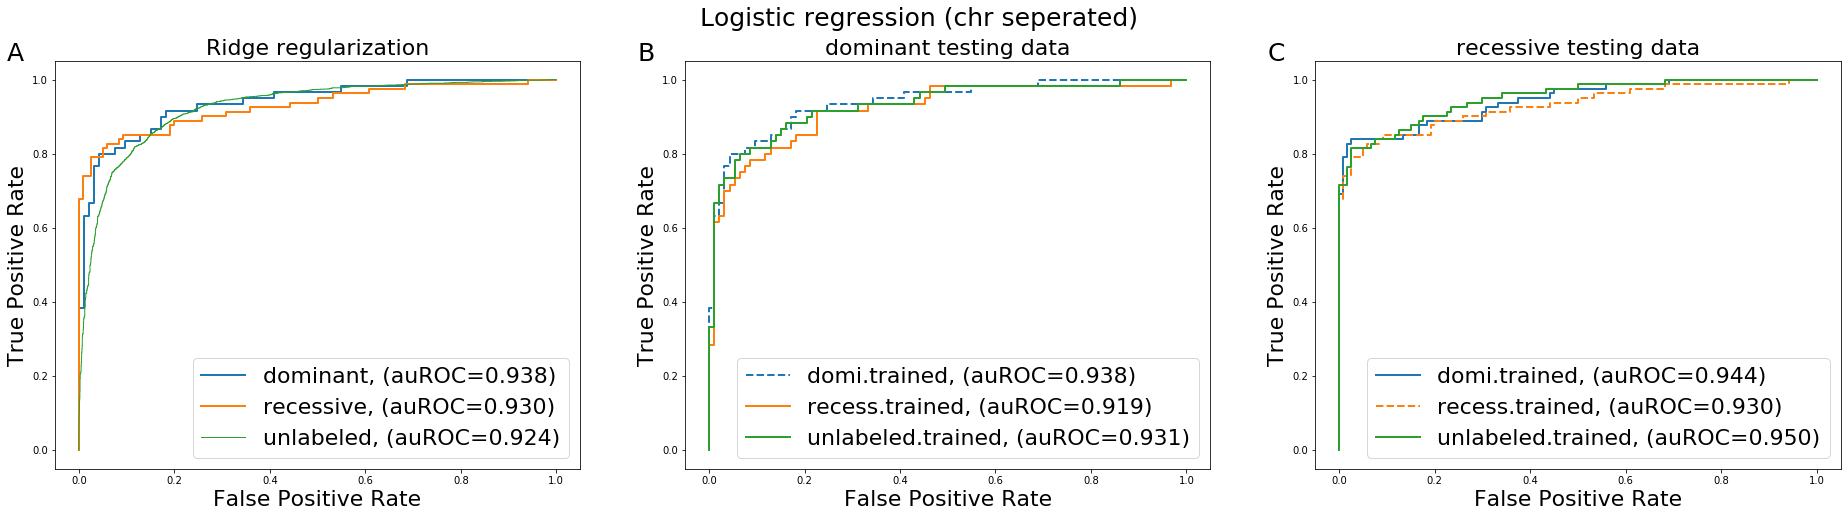

In [11]:
plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('Logistic regression (chr seperated)', size = 25)

get_ROC(ax[0],domi_l2[0], domi_l2[1],label = 'dominant')
get_ROC(ax[0],recess_l2[0],recess_l2[1], label = "recessive")
get_ROC(ax[0],omit_l2[0],omit_l2[1], lw =1,label = "unlabeled",lastone = True, title = "Ridge regularization")
ax[0].text(-0.15, 1.05, 'A', size = 25)



# ridge cross
get_ROC(ax[1],domi_l2[0], domi_l2[1],label = 'domi.trained', linestyle = '--')
get_ROC(ax[1],domi_l2_cross[0], domi_l2_cross[1],label = 'recess.trained')
get_ROC(ax[1],domi_l2_overall[0], domi_l2_overall[1],label = 'unlabeled.trained', lastone = True, title = "dominant testing data")
ax[1].text(-0.15, 1.05, 'B', size = 25)
# overall crossed

get_ROC(ax[2],recess_l2_cross[0],recess_l2_cross[1], label = "domi.trained")
get_ROC(ax[2],recess_l2[0],recess_l2[1], label = "recess.trained", linestyle = '--')
get_ROC(ax[2],recess_l2_overall[0],recess_l2_overall[1], label = "unlabeled.trained", lastone = True, title = "recessive testing data")
ax[2].text(-0.15, 1.05, 'C', size = 25)
plt.savefig('figure/4_chr_LR_roc.pdf',bbox_inches='tight')

In [23]:
coef_domi = domi_l2[2].coef_.flatten()
coef_recess = recess_l2[2].coef_.flatten()
coef_overall = omit_l2[2].coef_.flatten()

cor_reg = pd.DataFrame({'domi_ridge':coef_domi, 'recess_ridge': coef_recess, 'overall': coef_overall}, index = x_column)
print(cor_reg)


                domi_ridge  recess_ridge   overall
SIFT_pred        -0.279841      0.259624  0.689912
LRT_pred          0.659122      0.330879  0.424472
MA_pred           0.001326      0.159863 -0.100313
PROVEN_pred       0.857359      0.130734  0.444425
SLR_score        -0.052628     -0.066239 -0.033525
SIFT_score       -0.142885     -0.100314  0.090144
LRT_omega         0.040396      0.028711 -0.002201
MA_score          0.309195      0.307771  0.482292
PROVEN_score      0.204648     -0.711724 -0.273554
Grantham          0.298333     -0.028756 -0.000687
HMMEntropy        0.493649      0.372476 -0.264720
HMMRelEntropy    -0.308712     -0.324086  0.383259
PredRSAB          0.056693     -0.074764  0.007961
PredRSAI          0.152017      0.103862  0.007324
PredRSAE         -0.083153      0.055081 -0.012144
PredBFactorF      0.024728      0.424620 -0.010550
PredBFactorM      0.002930      0.185649 -0.123705
PredBFactorS      0.031995      0.252335 -0.045372
PredStabilityH   -0.204174     

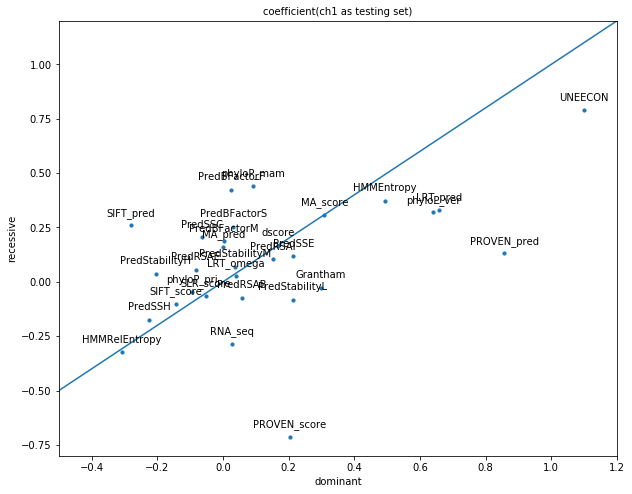

In [29]:
plt.rcParams['figure.figsize'] = [10,8]

a = np.arange(-1,4)
plt.plot(a,a)
plt.scatter(cor_reg['domi_ridge'], cor_reg['recess_ridge'], s = 10)
i = 0
for x,y in zip(cor_reg['domi_ridge'], cor_reg['recess_ridge']):
    label = cor_reg.index[i]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 size =10)
    i += 1
plt.title('coefficient(ch1 as testing set)', size = 10)
#plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['figure.figsize'] = [6,4]
plt.xlim(-0.5,1.2)
plt.ylim(-0.8,1.2)
plt.xlabel('dominant', size = 10)
plt.ylabel('recessive', size = 10)
plt.savefig('figure/4_ch1_ridge_coeff.pdf')
plt.show()

In [7]:
# SVM
def svm_model(Xtrain, ytrain, Xtest, ytest, c, gamma_value, bestkernel, model = False):
    if(model != False):
        clf = model
        
    else: 
        print(c, gamma_value, bestkernel)
        clf = SVC(kernel = bestkernel, C = c, gamma = gamma_value)
        clf.fit(Xtrain, ytrain)

    test_hat = clf.decision_function(Xtest)
    #test_hat = clf.predict(Xtest)
    return(ytest, test_hat, clf)


1 0.01 rbf
1 0.01 rbf
10 0.01 rbf


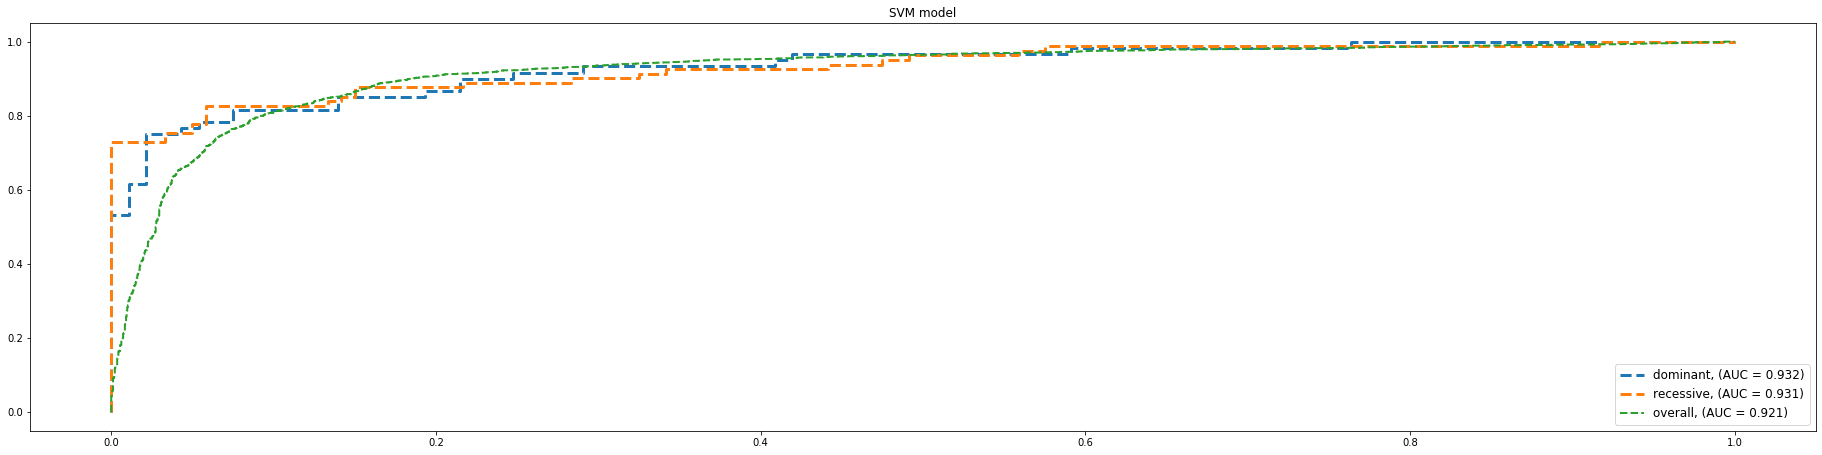

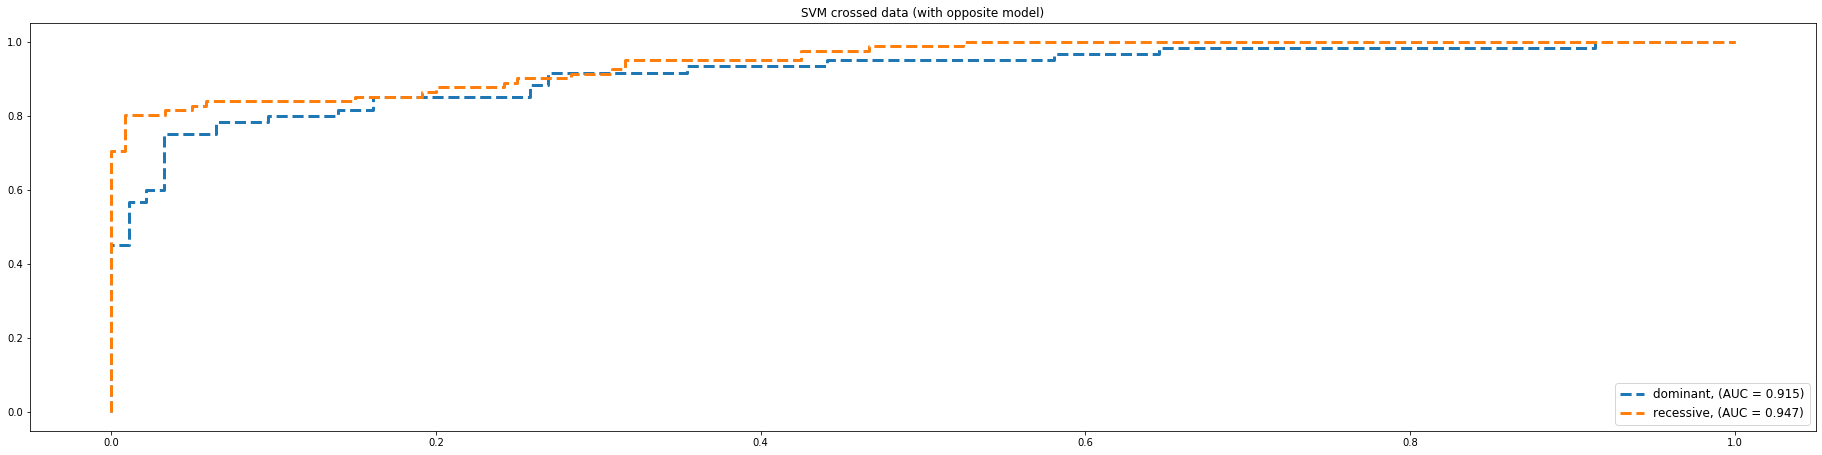

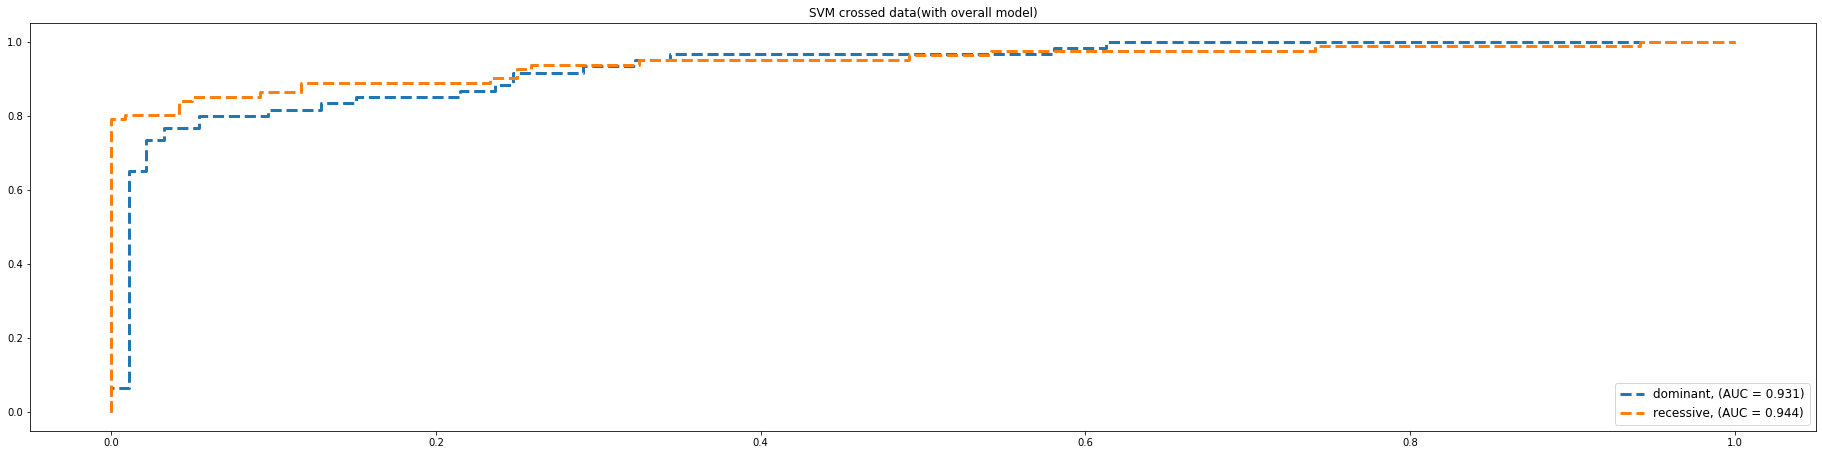

In [15]:
svm_domi = svm_model( X_train2_domi, y_train2_domi, X_test_domi, y_test_domi,1, 0.01, 'rbf')
svm_recess = svm_model(X_train2_recess, y_train2_recess, X_test_recess, y_test_recess, 1, 0.01, 'rbf')
svm_omit = svm_model(X_train2, y_train2, X_test, y_test, 10,0.01, 'rbf')


#plt.rcParams['figure.figsize'] = [6,4]
drawROC(svm_domi[0],svm_domi[1], label = 'dominant')
drawROC(svm_recess[0],svm_recess[1], label = 'recessive')
drawROC(svm_omit[0],svm_omit[1], lw = 2,label = 'overall', lastone = True, title = 'SVM model')

#cross model(dominant & recessive)
domi_cross = svm_model(0,0,X_test_domi, y_test_domi,0,0,0, model = svm_recess[2])
recess_cross = svm_model(0,0,X_test_recess, y_test_recess,0,0,0, model = svm_domi[2])

drawROC(domi_cross[0], domi_cross[1], label = 'dominant')
drawROC(recess_cross[0], recess_cross[1], label = 'recessive', lastone = True, title = 'SVM crossed data (with opposite model)')

#cross model(with overall data)
domi_overall = svm_model(0,0,X_test_domi, y_test_domi, 0,0,0, model = svm_omit[2])
recess_overall = svm_model(0,0,X_test_recess, y_test_recess, 0,0,0, model = svm_omit[2])

drawROC(domi_overall[0], domi_overall[1], label = 'dominant')
drawROC(recess_overall[0], recess_overall[1], label = 'recessive', lastone = True, title = 'SVM crossed data(with overall model)')

1 0.01 rbf
1 0.01 rbf


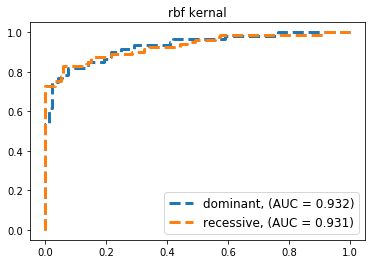

10 0.01 linear
10 0.1 linear


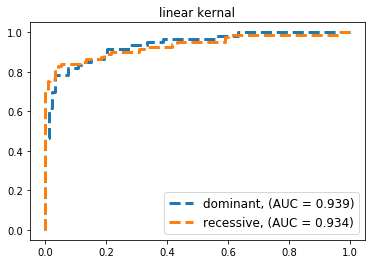

In [27]:
# 0804 recheck #compared with linear kernal
svm_domi = svm_model( X_train2_domi, y_train2_domi, X_test_domi, y_test_domi,1,0.01, 'rbf')
svm_recess = svm_model(X_train2_recess, y_train2_recess, X_test_recess, y_test_recess, 1,0.01, 'rbf')

drawROC(svm_domi[0],svm_domi[1], label = 'dominant')
drawROC(svm_recess[0],svm_recess[1], label = 'recessive', lastone = True, title = 'rbf kernal')


#linear
svm_domi = svm_model( X_train2_domi, y_train2_domi, X_test_domi, y_test_domi,10,0.01, 'linear')
svm_recess = svm_model(X_train2_recess, y_train2_recess, X_test_recess, y_test_recess, 10,0.1, 'linear')


drawROC(svm_domi[0],svm_domi[1], label = 'dominant')
drawROC(svm_recess[0],svm_recess[1], label = 'recessive', lastone = True, title = 'linear kernal')


1 0.01 rbf
1 0.01 rbf


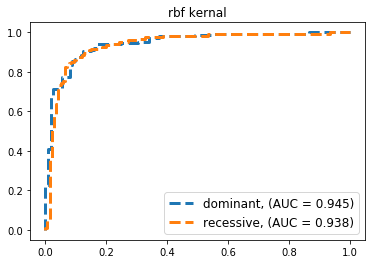

10 0.01 linear
10 0.1 linear


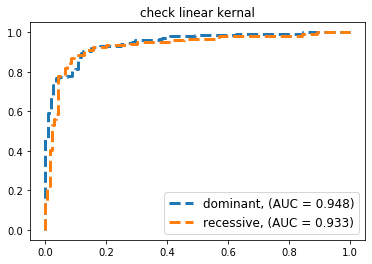

In [28]:
# recheck 0804 
#use validation dataset as testing dataset ( test if the validation dataset is biased)

svm_domi = svm_model(X_train2_domi, y_train2_domi, X_valid_domi, y_valid_domi,1,0.01, 'rbf')
svm_recess = svm_model(X_train2_recess, y_train2_recess, X_valid_recess, y_valid_recess, 1,0.01, 'rbf')


drawROC(svm_domi[0],svm_domi[1], label = 'dominant')
drawROC(svm_recess[0],svm_recess[1], label = 'recessive', lastone = True, title = 'rbf kernal')



#compared with linear kernal
svm_domi = svm_model( X_train2_domi, y_train2_domi, X_valid_domi, y_valid_domi,10 ,0.01, 'linear')
svm_recess = svm_model(X_train2_recess, y_train2_recess, X_valid_recess, y_valid_recess, 10,0.1, 'linear')

plt.rcParams['figure.figsize'] = [6,4]
drawROC(svm_domi[0],svm_domi[1], label = 'dominant')
drawROC(svm_recess[0],svm_recess[1], label = 'recessive', lastone = True, title = "check linear kernal")



In [ ]:
# SVM with linear model

svm_domi = svm_model(X_train2_domi, y_train2_domi, X_test_domi, y_test_domi,10,0.01, 'linear')
svm_recess = svm_model(X_train2_recess, y_train2_recess, X_test_recess, y_test_recess, 10,0.1, 'linear')
svm_omit = svm_model(X_train2, y_train2, X_test, y_test, 100,0.01, 'linear')

#plt.rcParams['figure.figsize'] = [6,4]
drawROC(svm_domi[0],svm_domi[1], label = 'dominant')
drawROC(svm_recess[0],svm_recess[1], label = 'recessive')
drawROC(svm_omit[0],svm_omit[1], lw = 2,label = 'overall', lastone = True, title = 'SVM model')

#cross model(dominant & recessive)
domi_cross = svm_model(0,0,X_test_domi, y_test_domi,0,0,0, model = svm_recess[2])
recess_cross = svm_model(0,0,X_test_recess, y_test_recess,0,0,0, model = svm_domi[2])

drawROC(domi_cross[0], domi_cross[1], label = 'dominant')
drawROC(recess_cross[0], recess_cross[1], label = 'recessive', lastone = True, title = 'SVM crossed data (with opposite model)')

#cross model(with overall data)
domi_overall = svm_model(0,0,X_test_domi, y_test_domi, 0,0,0, model = svm_omit[2])
recess_overall = svm_model(0,0,X_test_recess, y_test_recess, 0,0,0, model = svm_omit[2])

drawROC(domi_overall[0], domi_overall[1], label = 'dominant')
drawROC(recess_overall[0], recess_overall[1], label = 'recessive', lastone = True, title = 'SVM crossed data(with overall model)')

10 0.01 linear
10 0.1 linear
100 0.01 linear


In [13]:
# gradient boosting
tuned_parameters = {"learning_rate" : [0.05,0.1,0.15], 
                   "n_estimators": [100,150,200],
                    "max_depth": [3,5,8]}

In [9]:
#dominant
tuning(X_valid_domi, y_valid_domi, 'gradient boosting', tuned_parameters)

# Tuning hyper-parameters for recall



/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:
{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100}
With score : 0.876

Grid scores on development set:

0.874 (+/-0.107) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.859 (+/-0.115) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.863 (+/-0.107) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.840 (+/-0.072) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.840 (+/-0.072) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
0.831 (+/-0.080) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.809 (+/-0.146) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
0.806 (+/-0.173) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
0.810 (+/-0.165) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
0.868 (+/-0.116) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.864 (+/-0.125) for 

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
#recessive
tuning(X_valid_recess, y_valid_recess, 'gradient boosting', tuned_parameters)

# Tuning hyper-parameters for recall



/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
With score : 0.827

Grid scores on development set:

0.823 (+/-0.122) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.819 (+/-0.081) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.800 (+/-0.092) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.794 (+/-0.160) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.798 (+/-0.155) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
0.802 (+/-0.150) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.793 (+/-0.106) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
0.803 (+/-0.119) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
0.804 (+/-0.085) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
0.827 (+/-0.121) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.815 (+/-0.083) for {

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
#overall
tuning(X_valid, y_valid, 'gradient boosting', tuned_parameters)

/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Tuning hyper-parameters for recall

Best parameters set found on development set:
{'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 200}
With score : 0.882

Grid scores on development set:

0.879 (+/-0.039) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.879 (+/-0.045) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.878 (+/-0.041) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.882 (+/-0.046) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.882 (+/-0.046) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
0.881 (+/-0.044) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.877 (+/-0.039) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
0.877 (+/-0.043) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150}
0.878 (+/-0.045) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
0.880 (+/-0.043) for {'learning_rate': 0.1, 'max_depth': 3, 'n_e

In [14]:
def fitting_gb(Xtrain, ytrain, Xtest, ytest, learning, depth, estimator, fitmodel = False):
    if(fitmodel == False):
        model = GradientBoostingClassifier(learning_rate = learning, max_depth = depth, n_estimators = estimator, subsample = 1)
        model.fit(Xtrain, ytrain)
    else:
        model = fitmodel
    
    model_pred = model.decision_function(Xtest)
    return(ytest, model_pred, model)

In [14]:
domi_gb = fitting_gb(X_train2_domi, y_train2_domi, X_test_domi, y_test_domi, 0.15, 3, 100)
recess_gb = fitting_gb( X_train2_recess, y_train2_recess, X_test_recess, y_test_recess, 0.1, 3, 100)
omit_gb = fitting_gb(X_train2, y_train2, X_test, y_test, 0.15, 8, 200)

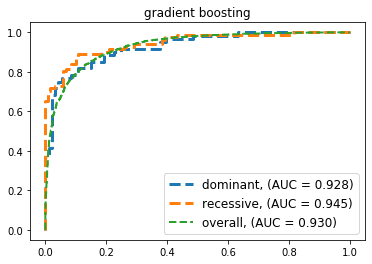

In [15]:
plt.rcParams['figure.figsize'] = [6,4]
drawROC(domi_gb[0], domi_gb[1], label = 'dominant')
drawROC(recess_gb[0], recess_gb[1], label = 'recessive')
drawROC(omit_gb[0], omit_gb[1], label = 'overall', lw = 2, lastone = True, title = 'gradient boosting')

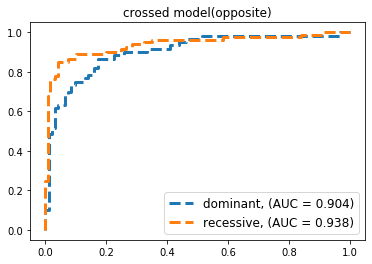

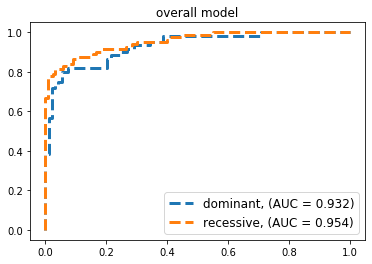

In [16]:
# cross model
domi_cross_gb = fitting_gb(0,0,X_test_domi, y_test_domi,0,0,0, fitmodel = recess_gb[2])
recess_cross_gb = fitting_gb(0,0, X_test_recess, y_test_recess ,0,0,0, fitmodel = domi_gb[2])

drawROC(domi_cross_gb[0], domi_cross_gb[1], label = 'dominant')
drawROC(recess_cross_gb[0], recess_cross_gb[1], label = 'recessive', lastone = True, title = 'crossed model(opposite)')


# using overall model
domi_overall_gb = fitting_gb(0,0,X_test_domi, y_test_domi,0,0,0, fitmodel = omit_gb[2])
recess_overall_gb = fitting_gb(0,0,X_test_recess, y_test_recess,0,0,0, fitmodel = omit_gb[2])

drawROC(domi_overall_gb[0], domi_overall_gb[1], label = 'dominant')
drawROC(recess_overall_gb[0], recess_overall_gb[1], label = 'recessive', lastone = True, title = 'overall model')



In [85]:
comparison = pd.DataFrame({'result':y_test, 'logistic':omit_l2[1] ,'svm': svm_omit[1],'boosting': omit_gb[1]})

comparison.to_csv('~/work/project/not_conflict/r_noconflict/0730/ch1ch2testing/overall_comparison.tsv', sep = '\t',index = False)

In [89]:
domi_comparison = pd.DataFrame({'result':y_test_domi, 'boosting': domi_gb[1], 'opposite_model':domi_cross_gb[1], 'omit_model':domi_overall_gb[1]})

recess_comparison = pd.DataFrame({'result':y_test_recess, 'boosting': recess_gb[1], 'opposite_model':recess_cross_gb[1], 'omit_model':recess_overall_gb[1]})



domi_comparison.to_csv('~/work/project/not_conflict/r_noconflict/0730/ch1ch2testing/domi_comparison.tsv', sep = '\t',index = False)
recess_comparison.to_csv('~/work/project/not_conflict/r_noconflict/0730/ch1ch2testing/recess_comparison.tsv', sep = '\t',index = False)

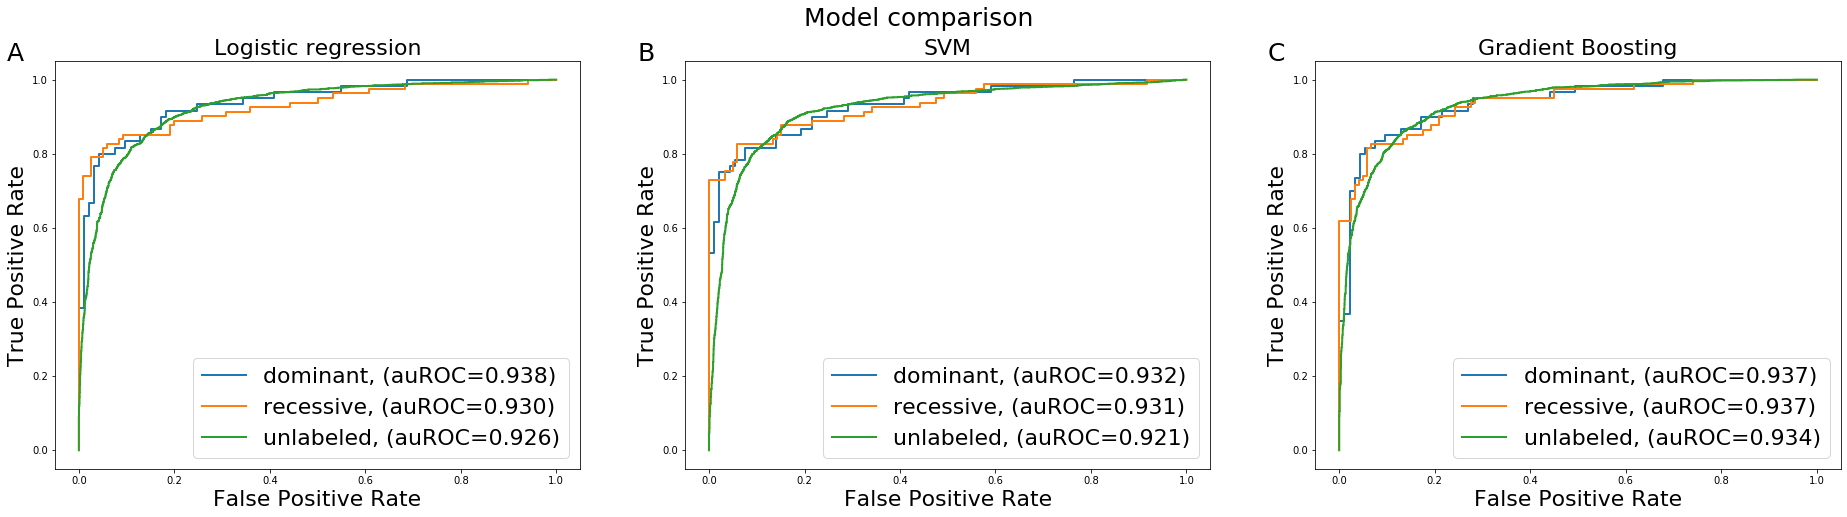

In [20]:
plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('Model comparison', size = 25)

get_ROC(ax[0],domi_l2[0],domi_l2[1], label = 'dominant')
get_ROC(ax[0],recess_l2[0],recess_l2[1], label = 'recessive')
get_ROC(ax[0],omit_l2[0],omit_l2[1], lw = 2,label = 'unlabeled', lastone = True, title = 'Logistic regression')

ax[0].text(-0.15, 1.05, 'A', size = 25)

get_ROC(ax[1],svm_domi[0],svm_domi[1], label = 'dominant')
get_ROC(ax[1],svm_recess[0],svm_recess[1], label = 'recessive')
get_ROC(ax[1],svm_omit[0],svm_omit[1], lw = 2,label = 'unlabeled', lastone = True, title = 'SVM')
ax[1].text(-0.15, 1.05, 'B', size = 25)



get_ROC(ax[2],domi_gb[0],domi_gb[1], label = 'dominant')
get_ROC(ax[2],recess_gb[0],recess_gb[1], label = 'recessive')
get_ROC(ax[2],omit_gb[0],omit_gb[1], lw = 2,label = 'unlabeled', lastone = True, title = 'Gradient Boosting')

ax[2].text(-0.15, 1.05, 'C', size = 25)
plt.savefig('figure/4_chr_model_comparison.pdf',bbox_inches='tight')
plt.show()

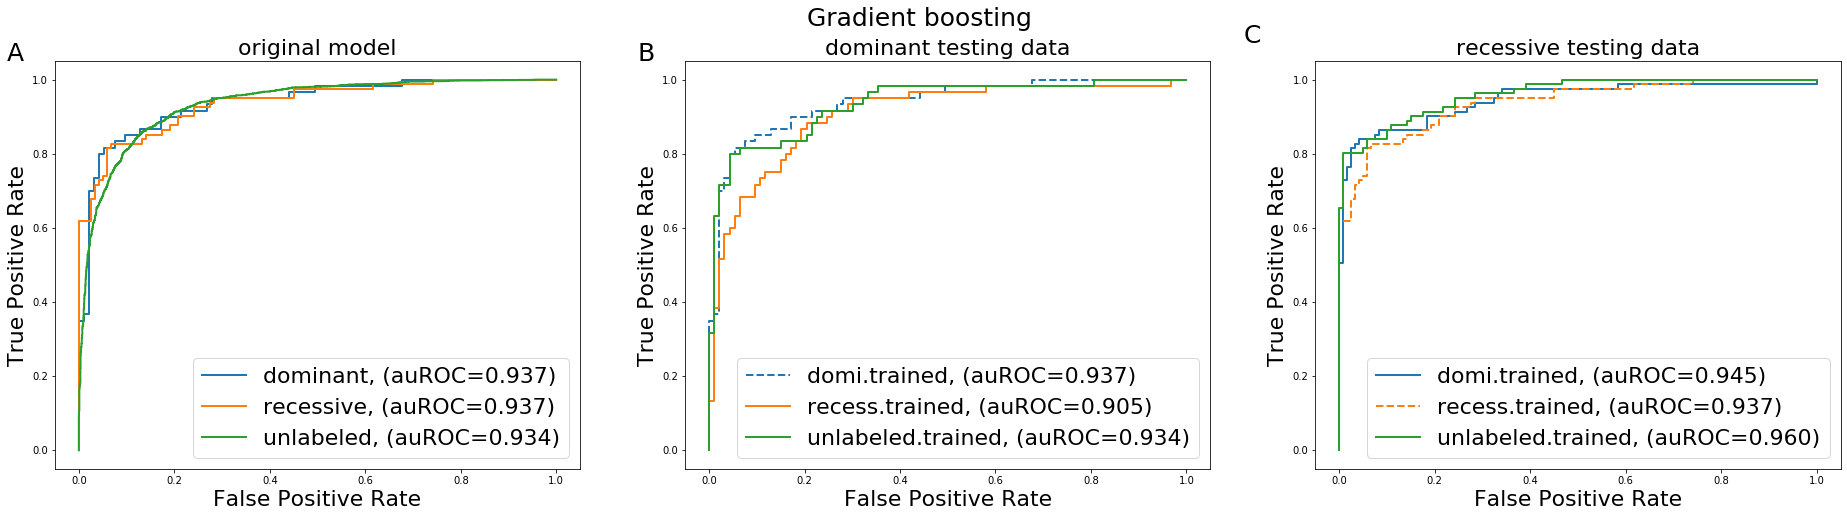

In [14]:
plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('Gradient boosting', size = 25)


#ORIGINAL
# domi_gb = fitting_gb(X_train_domi, y_train_domi, X_test_domi, y_test_domi, 0.1, 3, 150)
# recess_gb = fitting_gb( X_train_recess, y_train_recess, X_test_recess, y_test_recess, 0.1, 5, 200)
# omit_gb = fitting_gb(X_train, y_train, X_test, y_test, 0.1, 3, 150)


get_ROC(ax[0],domi_gb[0],domi_gb[1], label = 'dominant')
get_ROC(ax[0],recess_gb[0],recess_gb[1], label = 'recessive')
get_ROC(ax[0],omit_gb[0],omit_gb[1], lw = 2,label = 'unlabeled', lastone = True, title = 'original model')

ax[0].text(-0.15, 1.05, 'A', size = 25)


#DOMINANT

domi_cross_gb = fitting_gb(0,0,X_test_domi, y_test_domi,0,0,0, fitmodel = recess_gb[2])
domi_overall_gb = fitting_gb(0,0,X_test_domi, y_test_domi,0,0,0, fitmodel = omit_gb[2])


get_ROC(ax[1],domi_gb[0],domi_gb[1], label = 'domi.trained', linestyle = '--')
get_ROC(ax[1], domi_cross_gb[0],domi_cross_gb[1],label = 'recess.trained')
get_ROC(ax[1], domi_overall_gb[0],domi_overall_gb[1],label = 'unlabeled.trained',lastone = True, title = "dominant testing data")
ax[1].text(-0.15, 1.05, 'B', size = 25)



#RECESSIVE
#recess_cross_gb = fitting_gb(0,0, X_test_recess, y_test_recess ,0,0,0, fitmodel = domi_gb[2])
#recess_overall_gb = fitting_gb(0,0,X_test_recess, y_test_recess,0,0,0, fitmodel = omit_gb[2])

get_ROC(ax[2], recess_cross_gb[0],recess_cross_gb[1], label = "domi.trained")
get_ROC(ax[2],recess_gb[0],recess_gb[1], label = "recess.trained", linestyle = '--')
get_ROC(ax[2], recess_overall_gb[0],recess_overall_gb[1], label = 'unlabeled.trained', lastone = True, title = "recessive testing data")
ax[2].text(-0.2, 1.1, 'C', size = 25)

plt.savefig('figure/4_chr_gradientboosting_ROC.pdf',bbox_inches='tight')
plt.show()

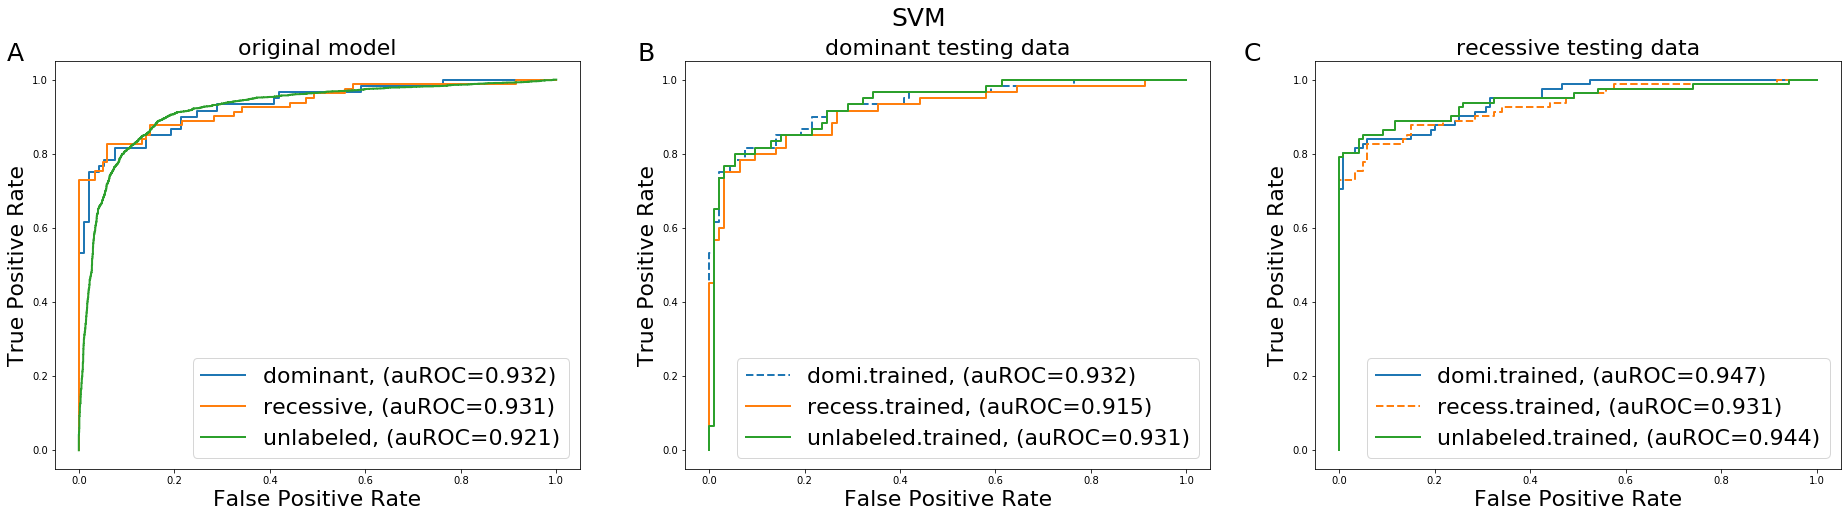

In [17]:
plt.rcParams['figure.figsize'] = [32,7.5]
fig, ax = plt.subplots(1, 3)
fig.suptitle('SVM', size = 25)


#ORIGINAL

get_ROC(ax[0],svm_domi[0],svm_domi[1], label = 'dominant')
get_ROC(ax[0],svm_recess[0],svm_recess[1], label = 'recessive')
get_ROC(ax[0],svm_omit[0],svm_omit[1], lw = 2,label = 'unlabeled', lastone = True, title = 'original model')

ax[0].text(-0.15, 1.05, 'A', size = 25)


#DOMINANT

domi_cross = svm_model(0,0,X_test_domi, y_test_domi,0,0,0, model = svm_recess[2])
domi_overall = svm_model(0,0,X_test_domi, y_test_domi, 0,0,0, model = svm_omit[2])

get_ROC(ax[1],svm_domi[0],svm_domi[1], label = 'domi.trained', linestyle = '--')
get_ROC(ax[1], domi_cross[0],domi_cross[1],label = 'recess.trained')
get_ROC(ax[1], domi_overall[0],domi_overall[1],label = 'unlabeled.trained',lastone = True, title = "dominant testing data")
ax[1].text(-0.15, 1.05, 'B', size = 25)



#RECESSIVE
recess_cross = svm_model(0,0,X_test_recess, y_test_recess,0,0,0, model = svm_domi[2])
recess_overall = svm_model(0,0,X_test_recess, y_test_recess, 0,0,0, model = svm_omit[2])

get_ROC(ax[2], recess_cross[0],recess_cross[1], label = "domi.trained")
get_ROC(ax[2],svm_recess[0],svm_recess[1], label = "recess.trained", linestyle = '--')
get_ROC(ax[2], recess_overall[0],recess_overall[1], label = 'unlabeled.trained', lastone = True, title = "recessive testing data")
ax[2].text(-0.2, 1.05, 'C', size = 25)

plt.savefig('figure/4_chr_svm_ROC.pdf',bbox_inches='tight')
plt.show()



In [8]:
print('1')

1
